<div class="alert alert-block alert-info">
<b> <center>Lending Case Club Study </center></b>  
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from numpy import cov
from scipy.stats import pearsonr
warnings.filterwarnings('ignore')
pd.options.display.float_format='{:.2f}'.format
sns.set_color_codes()

In [2]:
loan_data=pd.read_csv("loan.csv", low_memory=False)
loan_data.head()
pd.set_option('Max_Columns',100)
pd.set_option('Max_Rows',100)



In [3]:
loan_data.shape # shape the data frame (rows, col)
loan_data.dropna(axis = 1, how = 'all')
loan_data.set_index('id')
loan_data.shape


(39717, 111)

In [4]:
# checking any Duplicate ID
loan_data.duplicated(['id']).sum()

0

## Finding missing values and deleting them

In [5]:
#Finding % of missing values and null 
m_n=round((loan_data.isnull().sum()/len(loan_data.index))*100,2) 
# Check columns having morethan 70% missing
m_n[m_n>0].sort_values().count()#M=Missing Value & N=Null value
loan_data.count()

id                            39717
member_id                     39717
loan_amnt                     39717
funded_amnt                   39717
funded_amnt_inv               39717
                              ...  
tax_liens                     39678
tot_hi_cred_lim                   0
total_bal_ex_mort                 0
total_bc_limit                    0
total_il_high_credit_limit        0
Length: 111, dtype: int64

In [6]:
#Deleting columns if missing and Null vales gratethan 50%
loan_data.drop(m_n[m_n>50].index, axis=1,inplace=True)
loan_data.count()

id                            39717
member_id                     39717
loan_amnt                     39717
funded_amnt                   39717
funded_amnt_inv               39717
term                          39717
int_rate                      39717
installment                   39717
grade                         39717
sub_grade                     39717
emp_title                     37258
emp_length                    38642
home_ownership                39717
annual_inc                    39717
verification_status           39717
issue_d                       39717
loan_status                   39717
pymnt_plan                    39717
url                           39717
desc                          26777
purpose                       39717
title                         39706
zip_code                      39717
addr_state                    39717
dti                           39717
delinq_2yrs                   39717
earliest_cr_line              39717
inq_last_6mths              

In [7]:
#loan_data.drop([loan_data.nunique().sort_values()])
loan_data.shape



(39717, 54)

In [8]:
# Identify same values presented in all the columns
loan_data.nunique().sort_values()


tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
initial_list_status               1
collections_12_mths_ex_med        1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

In [9]:
#Dropping columns only one value presented becuase It dont give any explatation 
loan_data.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan'], axis=1, inplace=True)

 <div class="alert alert-block alert-warning">
<b> <center>Renaming Column names for better understanding </center></b> 
</div>

In [10]:
loan_data.rename(columns = {'term':'term_mths','int_rate':'int_rate_percentage','emp_length':'emp_length_years'}, inplace = True)

<div class="alert alert-block alert-warning">
<b> <center>Standardizing the data </center></b> 
</div>

##### Removing % symbol, removing + and < symbol from employee years format 
#### Months from term_months
 

In [11]:
loan_data["term_mths"]=loan_data["term_mths"].str.replace("months","")
loan_data["int_rate_percentage"]=loan_data["int_rate_percentage"].str.replace("%","").astype(float)
loan_data["emp_length_years"]=loan_data["emp_length_years"].str.replace("years","").str.replace("year"," ").str.replace("+"," ").str.replace("< 1","0")
loan_data["revol_util"]=loan_data["revol_util"].str.replace("%","")
#customer['Cust_id'] =customer['Cust_id'].map(lambda x: x.lstrip('Cust_'))

###### Converting below columns into integer

In [12]:
loan_data[['installment','recoveries','collection_recovery_fee','last_pymnt_amnt','annual_inc','total_rec_int','total_rec_prncp','total_rec_late_fee']]=round(loan_data[['installment','recoveries','collection_recovery_fee','last_pymnt_amnt','annual_inc','total_rec_int','total_rec_prncp','total_rec_late_fee']]).astype(int)
loan_data.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_mths,int_rate_percentage,installment,grade,sub_grade,emp_title,emp_length_years,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.00,36,10.65,163,B,B2,NaN,10,RENT,24000,Verified,01/12/2011,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,01/01/1985,1,3,0,13648,83.70,9,0.00,0.00,5863.16,5833.84,5000,863,0,0,0,01/01/2015,172,01/05/2016,0.00
1,1077430,1314167,2500,2500,2500.00,60,15.27,60,C,C4,Ryder,0,RENT,30000,Source Verified,01/12/2011,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,01/04/1999,5,3,0,1687,9.40,4,0.00,0.00,1008.71,1008.71,456,435,0,117,1,01/04/2013,120,01/09/2013,0.00
2,1077175,1313524,2400,2400,2400.00,36,15.96,84,C,C5,NaN,10,RENT,12252,Not Verified,01/12/2011,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,01/11/2001,2,2,0,2956,98.50,10,0.00,0.00,3005.67,3005.67,2400,606,0,0,0,01/06/2014,650,01/05/2016,0.00
3,1076863,1277178,10000,10000,10000.00,36,13.49,339,C,C1,AIR RESOURCES BOARD,10,RENT,49200,Source Verified,01/12/2011,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,01/02/1996,1,10,0,5598,21,37,0.00,0.00,12231.89,12231.89,10000,2215,17,0,0,01/01/2015,357,01/04/2016,0.00
4,1075358,1311748,3000,3000,3000.00,60,12.69,68,B,B5,University Medical Group,1,RENT,80000,Source Verified,01/12/2011,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,01/01/1996,0,15,0,27783,53.90,38,524.06,524.06,3513.33,3513.33,2476,1037,0,0,0,01/05/2016,68,01/05/2016,0.00



<div class="alert alert-block alert-danger">
 <b> <center>Deleting columns like title, zip code, address, url which are related to applicants profile as its not needed for current loan default analysis</center></b> 
</div>

In [13]:
#Delete SOme of COlumns which are not required for analysis
loan_data.drop(['id','member_id','desc','title','zip_code','addr_state','url','last_credit_pull_d'],axis=1,inplace=True)


In [14]:
# total_pymnt, total_pymnt_inv,emp_title,out_prncp,out_prncp_inv,(only for current customer)
loan_data.drop(['total_pymnt','total_pymnt_inv','emp_title','out_prncp','out_prncp_inv','last_pymnt_amnt'],axis=1,inplace=True)

In [15]:

#Finding % of missing values and null 
m_n=round((loan_data.isnull().sum()/len(loan_data.index))*100,2) 
m_n[m_n>0]#M=Missing Value & N=Null value


emp_length_years       2.71
revol_util             0.13
last_pymnt_d           0.18
pub_rec_bankruptcies   1.75
dtype: float64

In [16]:
#removing Null valued Rows in Data set
loan_data.dropna(subset=['emp_length_years','revol_util','last_pymnt_d','pub_rec_bankruptcies'], inplace=True)
m_n[round((loan_data.isnull().sum()/len(loan_data.index))*100,2)>0]#M=Missing Value & N=Null value


Series([], dtype: float64)

<div class="alert alert-block alert-warning">
<b> <center> Removing current employee </center></b> 
</div>

In [17]:
loan_data=loan_data[loan_data.loan_status != "Current"]
loan_data['loan_status'].unique()# columns of sub divison 


array(['Fully Paid', 'Charged Off'], dtype=object)

<div class="alert alert-block alert-warning">
<b> <center> Converting DataTime type </center></b> 
</div>


In [18]:
loan_data['issue_d']=pd.to_datetime(loan_data.issue_d,format='%d/%m/%Y')
  
loan_data['last_pymnt_d']=pd.to_datetime(loan_data.last_pymnt_d,format='%d/%m/%Y')
   


In [19]:
loan_data['purpose'].unique()


array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

<div class="alert alert-block alert-warning">
<b> <center>Derived Variables </center></b> 
</div>

In [20]:
loan_data['total_mnths_paid']=loan_data['last_pymnt_d']-loan_data['issue_d']
loan_data['total_mnths_paid'] = (round((loan_data.total_mnths_paid.dt.days.astype(int)/365))*12).astype(int)


<div class="alert alert-block alert-warning">
<b> <center> Loan Approved by Investor </center></b> 
</div>


##### We have derived a new column approved_loan_amnt_ratio from funded_amnt_inv to loan_data

In [21]:
# Loan Approved by Investor
loan_data['approved_loan_amnt_ratio'] = round(loan_data.funded_amnt_inv*100/loan_data.loan_amnt,2)

<div class="alert alert-block alert-warning">
<b> <center> Univariate Analysis </center></b> 
</div>

###### Below graph shows amount of applicants asking loan for certain 'Purpose', you can see there are more number of people asking loan for debt_consolidation

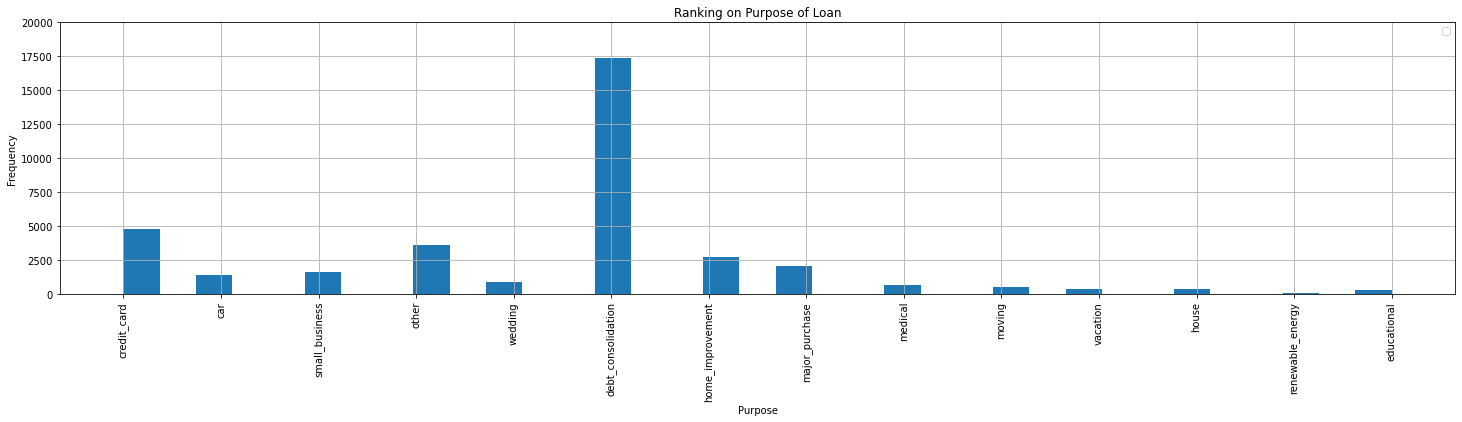

In [22]:
plt.figure(figsize=(25,5))
plt.rcParams.update({'font.size': 10})
plt.xticks(rotation=90)
plt.ylim(0, 20000)
plt.grid(True)
plt.hist(loan_data.purpose, bins=35)
plt.title('Ranking on Purpose of Loan')
plt.xlabel('Purpose')
plt.ylabel('Frequency')
plt.legend('Purpose','Freq')
plt.show()

<div class="alert alert-block alert-danger">
 <b> <center>Outlier Checking</center></b> 
</div>

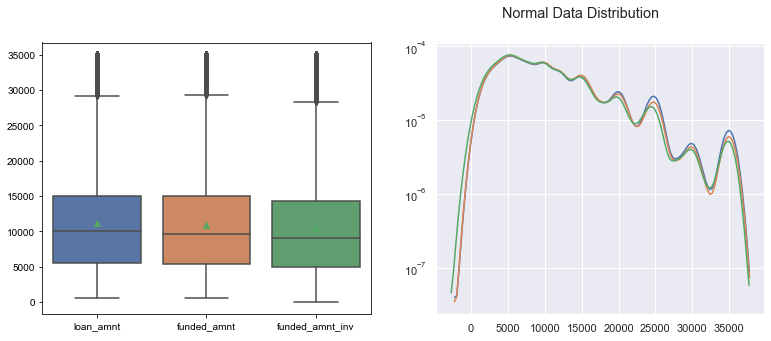

In [23]:
#Increasing the figure size of plot
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.set(style="darkgrid")
sns.boxplot(data=loan_data[['loan_amnt', 'funded_amnt','funded_amnt_inv']], orient='v',showmeans=True)
plt.suptitle('Data Distribution Box Plot')
plt.subplot(1,3,2)
sns.set(style="darkgrid")
sns.distplot(loan_data[['loan_amnt']], hist=False, rug=False)
sns.distplot(loan_data[['funded_amnt']], hist=False, rug=False)
sns.distplot(loan_data[['funded_amnt_inv']], hist=False, rug=False)
plt.yscale('log')
plt.suptitle('Normal Data Distribution ')
plt.show()


<div class="alert alert-block alert-success">
    <b>Observations:</b> Box plot shows that funded_amnt_inv has outlier presented in the data, we need make the normalization data removing outliers so that mean and medain will come inline with all loan amount.
</div>

In [24]:

round(loan_data[['loan_amnt','funded_amnt','funded_amnt_inv']].describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])).astype(int)


,loan_amnt,funded_amnt,funded_amnt_inv
count,36738,36738,36738
mean,11153,10884,10444
std,7368,7107,7008
min,500,500,0
5%,2400,2400,2000
10%,3200,3200,3000
25%,5500,5425,5000
50%,10000,9600,9000
75%,15000,15000,14351
90%,22000,20375,20000


#### Descriptive Statistics

<div class="alert alert-block alert-success">
<b>Observations:</b> Above Descriptive Statistics Table sshows that funded amount investment has zero values presented in data. Due this it will cause outlier presented in Funded amount investement.
</div>

<div class="alert alert-block alert-warning">
<b> <center>Distributed Graph for Interest rates for Fully paid and Charged OFF customer </center></b> 
</div>

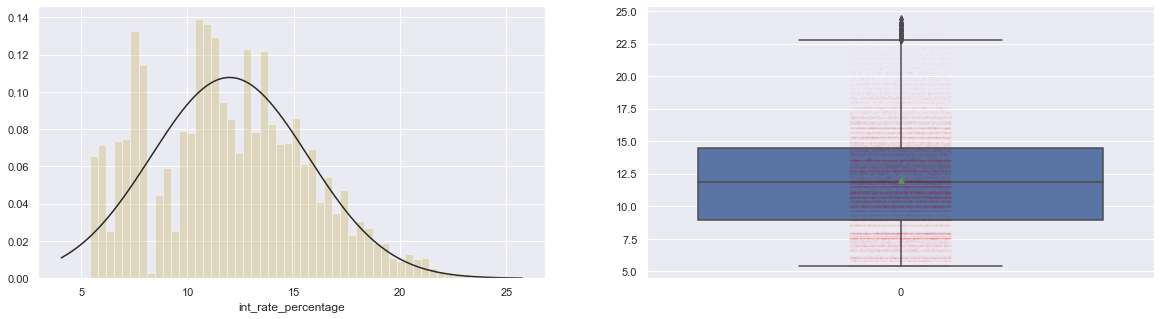

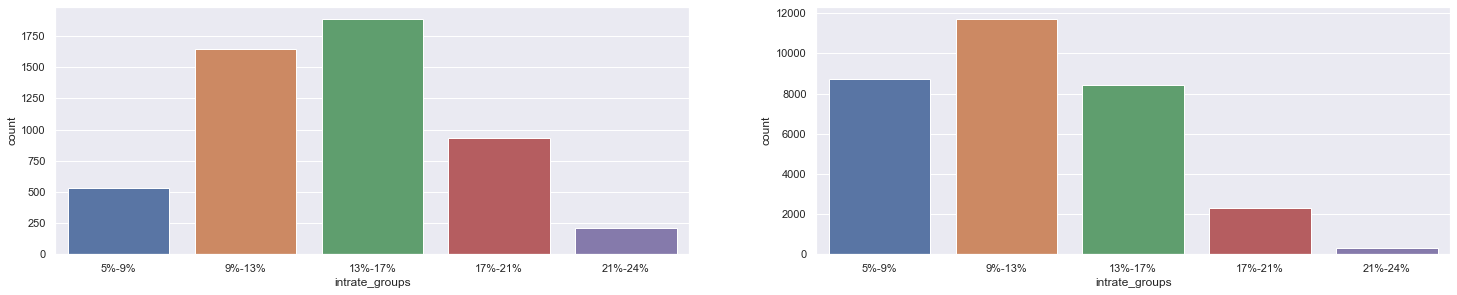

In [25]:
#int_rate_percentage
from scipy.stats import norm
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(loan_data.int_rate_percentage, fit=norm, kde=False, color="y")
plt.subplot(1,2,2)
sns.boxplot(data=loan_data.int_rate_percentage, orient='v',showmeans=True)
sns.stripplot( data = loan_data.int_rate_percentage ,color = 'red',size = 2, alpha = 0.01)
# Analysing  Intreset Rate group
loan_data['intrate_groups'] = pd.cut(loan_data['int_rate_percentage'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
fig, ax = plt.subplots(figsize = (25,10))
plt.subplot(221)
sns.countplot(x='intrate_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])
plt.subplot(222)
sns.countplot(x='intrate_groups', data=loan_data[loan_data.loan_status == 'Fully Paid'])
plt.show()
#Most borrower Took loan intrest rate lie between 9% to 14% whereas few borrower took high interest rate >23(around 250)


<div class="alert alert-block alert-success">
<b>Observations:</b> 1.In the above graph of interest rate distribution,you can see that the highest rate is between 10-15% for Fully Paid and Charged Off.2.Also, the two graphs below show a comparison of fully paid and charged Off applicants, the 'charged off' category has a large number of people with interest rates ranging from 13 to 17 percent, while the 'Fully paid' category has an interest rate ranging from 9 to 13 percent.
</div>


<div class="alert alert-block alert-warning">
<b> <center> Home owner Shipfor Customer </center></b> 
</div>

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

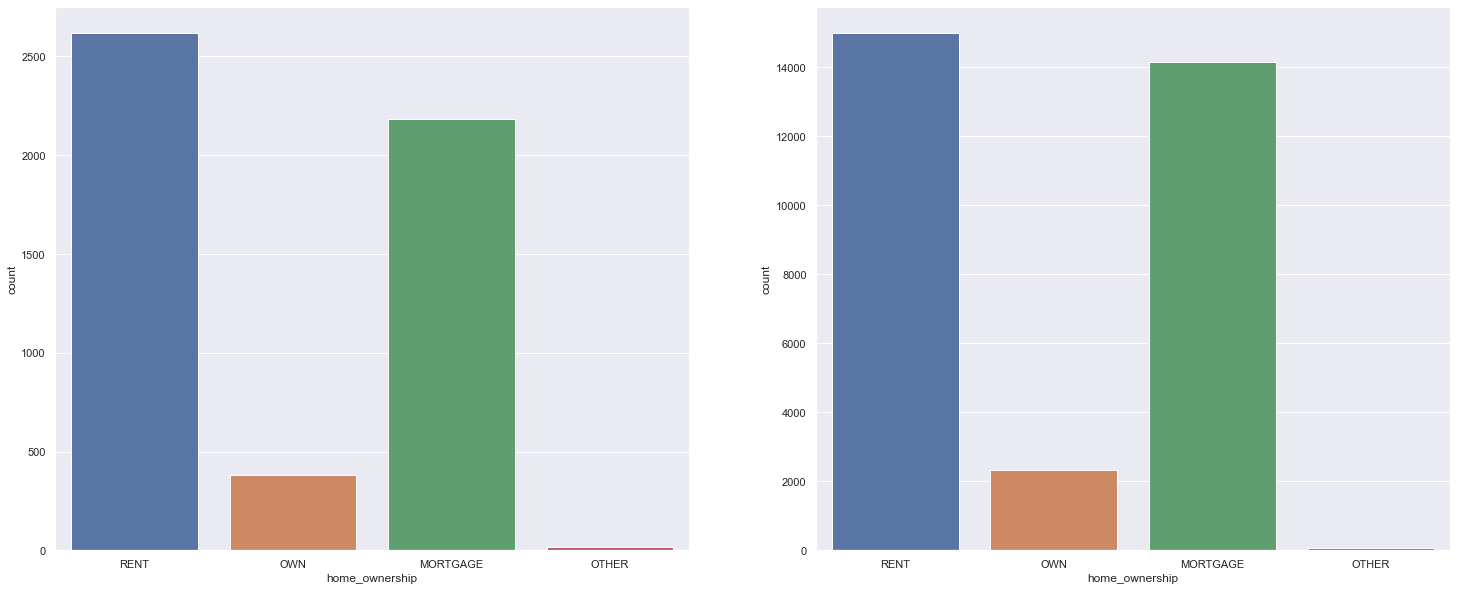

In [26]:
# Analysing  Loan borrowed person have assests
plt.subplots(figsize = (25,10))
plt.subplot(1,2,1)
sns.countplot(x='home_ownership', data=loan_data[loan_data.loan_status == 'Charged Off'])
#sns.countplot(x='verification_status', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.subplot(1,2,2)
sns.countplot(x='home_ownership', data=loan_data[loan_data.loan_status == 'Fully Paid'])
#Ratio between Rent and Mortage of Cahrged off customers are higher than Full Paid
# Rented Charged of customers are more than own house customers 



<div class="alert alert-block alert-warning">
<b> <center>Distributation of Graph for Verification status for Charged OFF customer </center></b> 
</div>

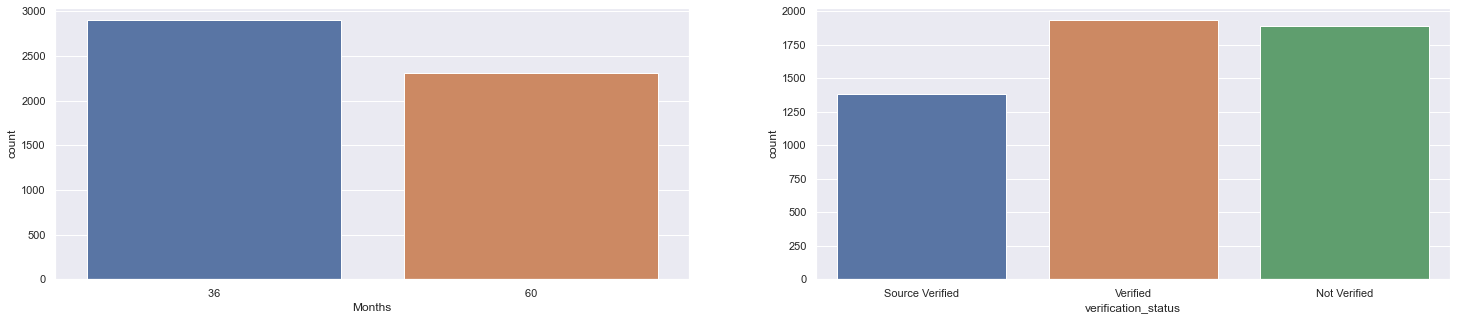

In [27]:
# Analysing  Loan borrowed person have assests
plt.subplots(figsize = (25,5))
plt.rcParams.update({'font.size': 30})
plt.subplot(1,2,1)
sns.countplot(x='term_mths', data=loan_data[loan_data.loan_status == 'Charged Off'])
plt.xlabel('Months')
#there are more charged off customer for 36 months than 60 months

# Analysing  Verification status for charged of customers.
plt.subplot(1,2,2)
sns.countplot(x='verification_status', data=loan_data[loan_data.loan_status=='Charged Off'])
plt.show()
#verified and not verified customers are more that source verified customers


<div class="alert alert-block alert-success">
<b>Observations:</b> 1) 'Charged Off' customers with less term period are high as they want to finish off the loan soon. 
2) 'Charged Off' customers with non-verified income source is very high, Lender should verify source of income and should reduce the risk,
 it will reduce the loss
</div>



<div class="alert alert-block alert-danger">
 <b> <center>Segmented variable</center></b> 
</div>

#### DTI is one of the imp risk variable, higher the dti high chances to not pay back or late payments

Text(0.5, 0, 'Loan_amount_group')

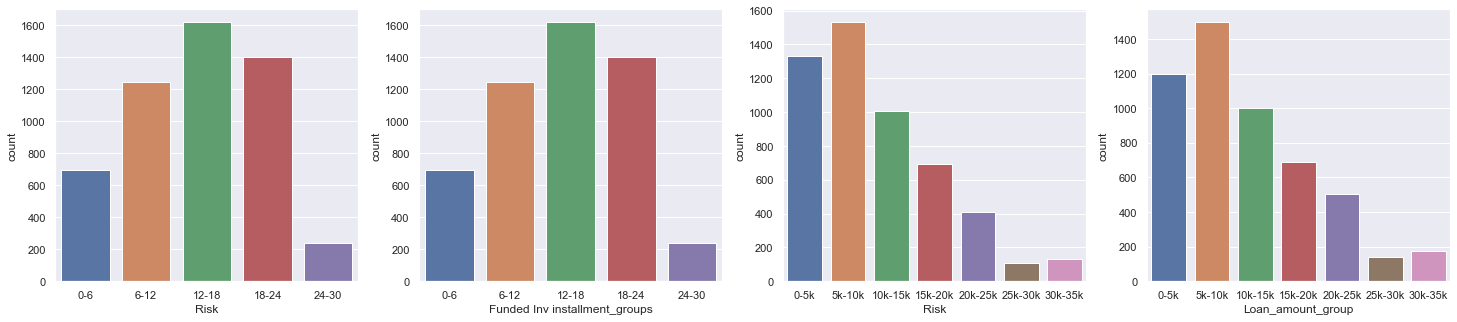

In [28]:
# analysing Risk dti
loan_data['dti_groups'] = pd.cut(loan_data['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])
plt.subplots(figsize = (25,5))
plt.rcParams.update({'font.size': 30})
plt.subplot(1,4,1)
sns.countplot(x='dti_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])
plt.xlabel('Risk')
# ###############
loan_data['installment_groups'] = pd.cut(loan_data['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
plt.subplot(1,4,2)
sns.countplot(x='dti_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])
plt.xlabel('Funded Inv installment_groups')
######
loan_data['fun_amnt_inv_group'] = pd.cut(loan_data['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
plt.subplot(1,4,3)
sns.countplot(x='fun_amnt_inv_group', data=loan_data[loan_data.loan_status == 'Charged Off'])
plt.xlabel('Risk')
########
#12345
loan_data['loan_amnt_groups'] = pd.cut(loan_data['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
plt.subplot(1,4,4)
sns.countplot(x='loan_amnt_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])
plt.xlabel('Loan_amount_group')

<div class="alert alert-block alert-success">
<b>Observations:</b> Use green boxes sparingly, and only for some specific 
purpose that the other boxes can't cover. For example, if you have a lot 
of related content to link to, maybe you decide to use green boxes for 
related links from each section of a notebook.
</div>

<div class="alert alert-block alert-warning">
<b> <center>Bivariate Analysis:correlation matric </center></b> 
</div>

#### The correlation matrix below of charged Off customers of different parameters gives relationship between many variables.

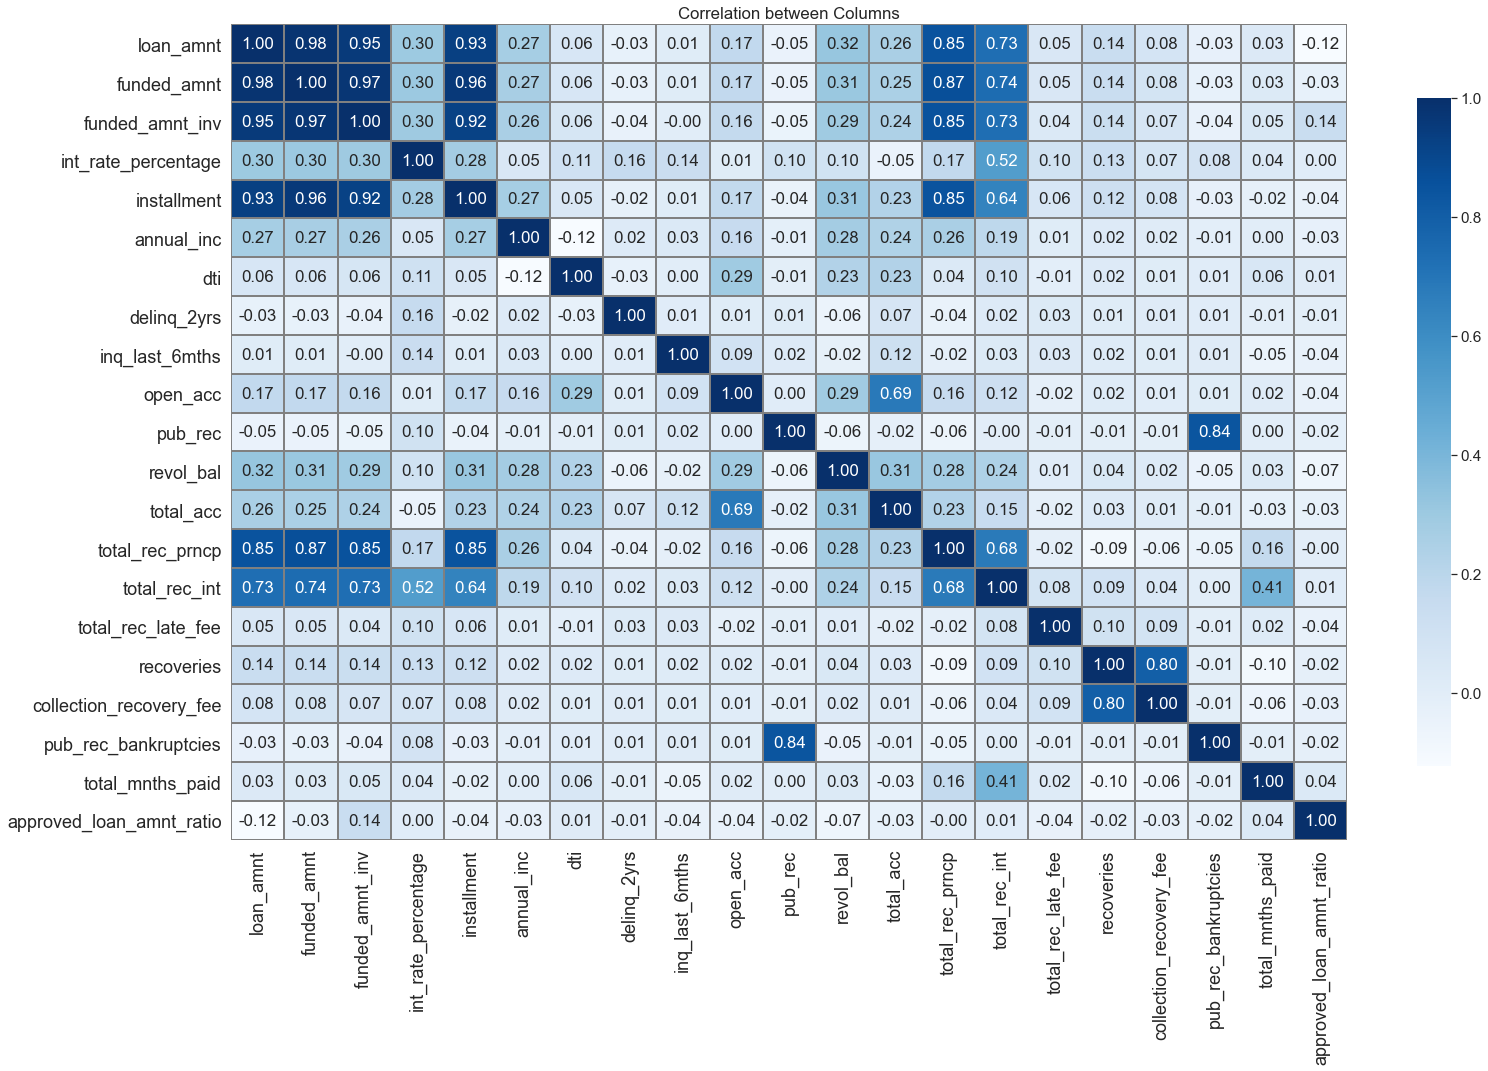

In [29]:
#Finding correlation matric
corr_matrix = loan_data.corr()
plt.figure(figsize=(25,15))
#plotting correlatioon matric on a heat map
sns.set(font_scale=1.4)
ax = sns.heatmap(corr_matrix,  annot = True, fmt='.2f',cmap='Blues',cbar_kws={"shrink": .82},
                  linewidths=0.1, linecolor='gray')
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 18)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 18)
plt.title("Correlation between Columns")
plt.show()


<div class="alert alert-block alert-success">
<b>Observations:</b> Positive correlation between loan amount, funded amount and funded amount investment, say, most of funded amount approved by loan amount if a person funded amount, it increases the likelihood of loan amount. 
Now, dti(Risk) is negatively correlated with annual income, if dti(Risk) increase than annual income customer is decrease Hence, Low income customer easily charged off.
</div>


Correlation cofficient: 0.2699509682755343


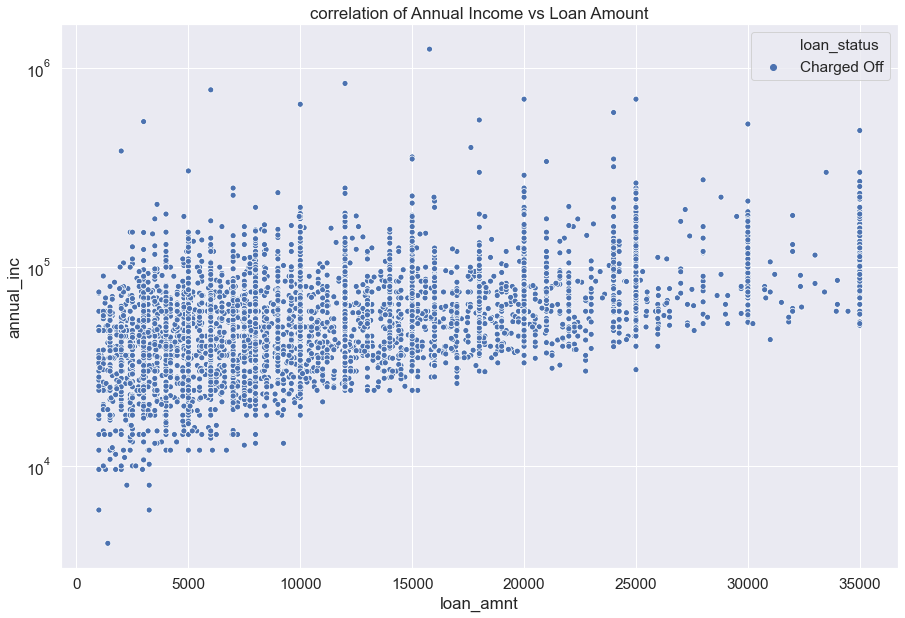

In [30]:

plt.figure(figsize=(15,10))
sns.scatterplot(x='loan_amnt', y='annual_inc', data=loan_data[loan_data.loan_status == 'Charged Off'],hue='loan_status')
plt.yscale('log')
plt.title("correlation of Annual Income vs Loan Amount")
corr, _ = pearsonr(loan_data.loan_amnt, loan_data.annual_inc)
print("Correlation cofficient:",corr)


<div class="alert alert-block alert-success">
<b>Observations:</b> The above graph correlation has positive.Hence if loan amount increase, annual income is increase. 
                     Hence, Charged off customers are more when loan amount increase while increase annual income
</div>

Correlation cofficient: 0.10793294296099253


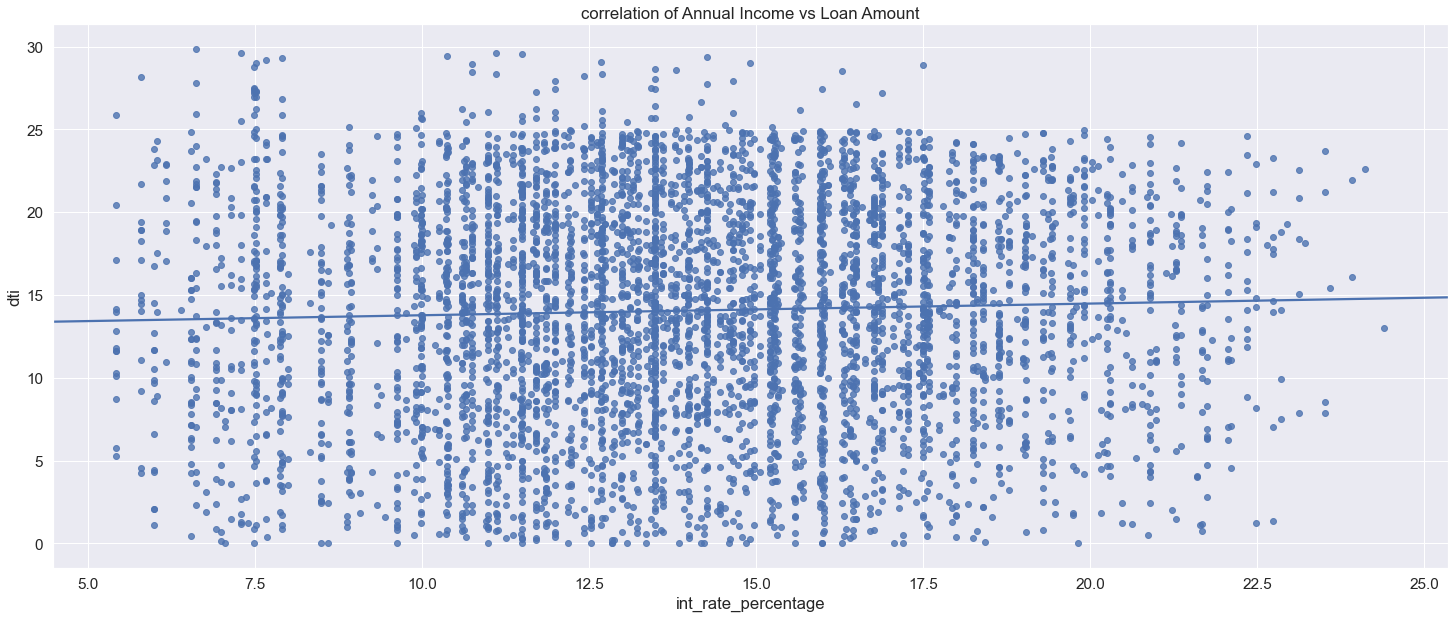

In [31]:
plt.figure(figsize=(25,10))
sns.regplot(x='int_rate_percentage', y='dti', data=loan_data[loan_data.loan_status == 'Charged Off'],ci=None)
plt.title("correlation of Annual Income vs Loan Amount")
corr, _ = pearsonr(loan_data.dti, loan_data.int_rate_percentage)
print("Correlation cofficient:",corr)

<div class="alert alert-block alert-success">
<b>Observations:</b> 1) The above graph correlation has positive.Hence if intrest rates increase, risk(dti) is also increase. 
                        Hence, Charged off customers are more when interest rate increase while risk increases.
                     2) Interest rates are high for people who use their credit cards frequently.
</div>

#### **Recommedations:**

- Interest rates are high for people who use their credit cards frequently Hence, Avoid giving loan who have high utlization       credit .
- Those who are seeking for a loan for 'home repair' and have an annual salary of $60,000-$70,000, Avoid giving loan who have      salary between 60k -70k
- Those with a 'MORTGAGE' house and an annual income of  ($60-70k) are risky even though they assest
- Those who get interest at a rate of (21.5-25) percent and have a income of $75,000-$80,000. avoid Those who take loan more          intreste at high house hold income
- Those who have taken out a loan between $30,001 and $35,001 and are paying an interest rate of 15-17.5 percent. This customer are moderate 
### Overall High interest rate getting charged off very easily and Rent ownership customer charged off is also very risk 
